In [ ]:
### EXPLORATION DE DONNEES

In [ ]:
### Import des modules nécessaires

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from bokeh.plotting import figure, output_notebook, show
output_notebook()

sns.set_theme()

### Import des modules de préprocessing

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

### Import des modèles de classifications à tester
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV, StratifiedKFold, RepeatedStratifiedKFold, cross_val_score
from sklearn.svm import SVC

### Import du dataset

url = 'https://raw.githubusercontent.com/QuentinLeffray/Projet-ATP-Bookmakers/main/atp_data.csv'

df = pd.read_csv(url)

### Première visualisation des données du dataset
df['Date'] = pd.to_datetime(df['Date'])
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44708 entries, 0 to 44707
Data columns (total 23 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   ATP         44708 non-null  int64         
 1   Location    44708 non-null  object        
 2   Tournament  44708 non-null  object        
 3   Date        44708 non-null  datetime64[ns]
 4   Series      44708 non-null  object        
 5   Court       44708 non-null  object        
 6   Surface     44708 non-null  object        
 7   Round       44708 non-null  object        
 8   Best of     44708 non-null  int64         
 9   Winner      44708 non-null  object        
 10  Loser       44708 non-null  object        
 11  WRank       44708 non-null  int64         
 12  LRank       44708 non-null  int64         
 13  Wsets       44521 non-null  float64       
 14  Lsets       44521 non-null  float64       
 15  Comment     44708 non-null  object        
 16  PSW         32743 non-

,ATP,Location,Tournament,Date,Series,Court,Surface,Round,Best of,Winner,...,Wsets,Lsets,Comment,PSW,PSL,B365W,B365L,elo_winner,elo_loser,proba_elo
0,1,Adelaide,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Dosedel S.,...,2.0,0.0,Completed,NaN,NaN,NaN,NaN,1500.0,1500.0,0.5
1,3,Doha,Qatar Open,2000-01-03,International,Outdoor,Hard,1st Round,3,Kiefer N.,...,2.0,0.0,Completed,NaN,NaN,NaN,NaN,1500.0,1500.0,0.5
2,3,Doha,Qatar Open,2000-01-03,International,Outdoor,Hard,1st Round,3,Gaudio G.,...,2.0,1.0,Completed,NaN,NaN,NaN,NaN,1500.0,1500.0,0.5
3,3,Doha,Qatar Open,2000-01-03,International,Outdoor,Hard,1st Round,3,El Aynaoui Y.,...,2.0,1.0,Completed,NaN,NaN,NaN,NaN,1500.0,1500.0,0.5
4,3,Doha,Qatar Open,2000-01-03,International,Outdoor,Hard,1st Round,3,Cherkasov A.,...,2.0,0.0,Completed,NaN,NaN,NaN,NaN,1500.0,1500.0,0.5


In [ ]:
### Contrôle des lignes en double, ici aucun doublon

df.duplicated().sum()

0

In [ ]:
### Contrôle des valeurs manquantes

df.isna().sum().loc[lambda x: x> 0].sort_values(ascending = False)

PSW      11965
PSL      11965
B365W     5671
B365L     5651
Wsets      187
Lsets      187
dtype: int64

In [ ]:
### Homogénéisation des données par la suppression des lignes où nous ne detenons pas l'information de côte de la part des deux bookmakers 

df = df.dropna(axis = 0, how = 'all', subset = ['PSW'])
df = df.dropna(axis = 0, how = 'all', subset = ['B365W'])

### Remplacement des valeurs NaN des W/LSets par 0 car uniquement des matchs Walkover(sans match joué) et Retired (match commencé mais sans set terminé pour le gagnant). 1 exception pour un match terminé, marginal donc remplacé par 0

df['Wsets'] = df['Wsets'].fillna(0)
df['Lsets'] = df['Lsets'].fillna(0)


In [ ]:
### Informations du DataFrame après traitement

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32343 entries, 8678 to 44707
Data columns (total 23 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   ATP         32343 non-null  int64         
 1   Location    32343 non-null  object        
 2   Tournament  32343 non-null  object        
 3   Date        32343 non-null  datetime64[ns]
 4   Series      32343 non-null  object        
 5   Court       32343 non-null  object        
 6   Surface     32343 non-null  object        
 7   Round       32343 non-null  object        
 8   Best of     32343 non-null  int64         
 9   Winner      32343 non-null  object        
 10  Loser       32343 non-null  object        
 11  WRank       32343 non-null  int64         
 12  LRank       32343 non-null  int64         
 13  Wsets       32343 non-null  float64       
 14  Lsets       32343 non-null  float64       
 15  Comment     32343 non-null  object        
 16  PSW         32343 n

In [ ]:
df.reset_index(drop=True, inplace=True)

df

,ATP,Location,Tournament,Date,Series,Court,Surface,Round,Best of,Winner,...,Wsets,Lsets,Comment,PSW,PSL,B365W,B365L,elo_winner,elo_loser,proba_elo
0,3,Doha,Qatar Exxon Mobil Open,2004-01-05,International,Outdoor,Hard,1st Round,3,Ulihrach B.,...,2.0,0.0,Completed,2.210,1.719,2.200,1.615,1486.195239,1618.182210,0.318694
1,3,Doha,Qatar Exxon Mobil Open,2004-01-05,International,Outdoor,Hard,1st Round,3,Youzhny M.,...,2.0,0.0,Completed,3.250,1.385,2.875,1.364,1615.057648,1820.759485,0.234313
2,3,Doha,Qatar Exxon Mobil Open,2004-01-05,International,Outdoor,Hard,1st Round,3,Sargsian S.,...,2.0,1.0,Completed,1.746,2.180,1.571,2.250,1654.468551,1588.330984,0.594046
3,2,Chennai,TATA Open,2004-01-05,International,Outdoor,Hard,1st Round,3,Lisnard J.R.,...,2.0,0.0,Completed,1.562,2.580,1.571,2.250,1533.308961,1473.299803,0.585511
4,2,Chennai,TATA Open,2004-01-05,International,Outdoor,Hard,1st Round,3,Levy H.,...,2.0,0.0,Completed,1.641,2.360,1.570,2.250,1401.283125,1418.621881,0.475068
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32338,17,Dubai,Dubai Tennis Championships,2018-03-03,ATP500,Outdoor,Hard,The Final,3,Bautista Agut R.,...,2.0,0.0,Completed,1.650,2.430,1.660,2.200,1835.901543,1842.459807,0.490563
32339,16,Acapulco,Abierto Mexicano,2018-03-03,ATP500,Outdoor,Hard,Semifinals,3,Anderson K.,...,2.0,1.0,Completed,1.340,3.630,1.300,3.500,1843.576914,1647.967561,0.755103
32340,18,Sao Paulo,Brasil Open,2018-03-03,ATP250,Indoor,Clay,Semifinals,3,Jarry N.,...,2.0,1.0,Completed,1.850,2.090,1.900,1.900,1588.293069,1619.758421,0.454841
32341,16,Acapulco,Abierto Mexicano,2018-03-04,ATP500,Outdoor,Hard,The Final,3,Del Potro J.M.,...,2.0,0.0,Completed,1.520,2.750,1.500,2.620,1966.532849,1851.413609,0.659862


In [ ]:
### DATAVIZ

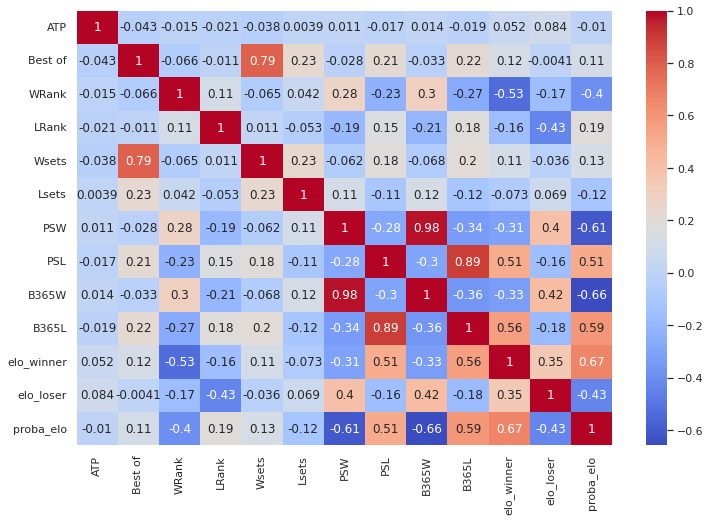

In [ ]:
# Heatmap / Matrice de correlation

fig, ax = plt.subplots(figsize = (12,8))

sns.heatmap(df.corr(), ax = ax, cmap = 'coolwarm', annot = True);

In [ ]:
### Création des colonnes permettant de savoir si un joueur ayant un meilleur ELO / Rang / Favori pour Pinnacle / Favori pour Bet365 gagne
df['ELO_Predicable_Win'] = (df['elo_winner'] - df['elo_loser']).apply(lambda x: True if  x > 0  else False)
df['Rank_Predicable_Win'] = (df['WRank'] - df['LRank']).apply(lambda x: True if  x < 0  else False)
df['Pinnacle_Predicable_Win'] = (df['PSW'] - df['PSL']).apply(lambda x: True if  x < 0  else False)
df['B365_Predicable_Win'] = (df['B365W'] - df['B365L']).apply(lambda x: True if  x < 0  else False)

### value_counts() pour chacune des variables crées, permettant de déterminer une certaine cohérence dans les données
display(df['ELO_Predicable_Win'].value_counts())
display(df['Rank_Predicable_Win'].value_counts())
display(df['Pinnacle_Predicable_Win'].value_counts())
display(df['B365_Predicable_Win'].value_counts())

### Création de la colonne permettant de visualiser des écarts standardisés pour réaliser les graphiques
df['ELO_Diff'] = df['elo_winner'] - df['elo_loser']

df['ELO_Diff_Gagnant'] = pd.cut(x = df['ELO_Diff'],
                                bins = [-1000, -500, -400, -300, -200, -100, 0, 100, 200, 300, 400, 500, 1000],
                                labels = ['-1000 / -500','-500 / - 400', '-400 / - 300', '-300 / -200', '-200 / -100', '-100 / 0', 
                                          '0 / 100', '100 / 200', '200 / 300', '300 / 400', '400 / 500', '500 / 1000'])


True     21697
False    10646
Name: ELO_Predicable_Win, dtype: int64

True     21337
False    11006
Name: Rank_Predicable_Win, dtype: int64

True     22693
False     9650
Name: Pinnacle_Predicable_Win, dtype: int64

True     22392
False     9951
Name: B365_Predicable_Win, dtype: int64

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/seab

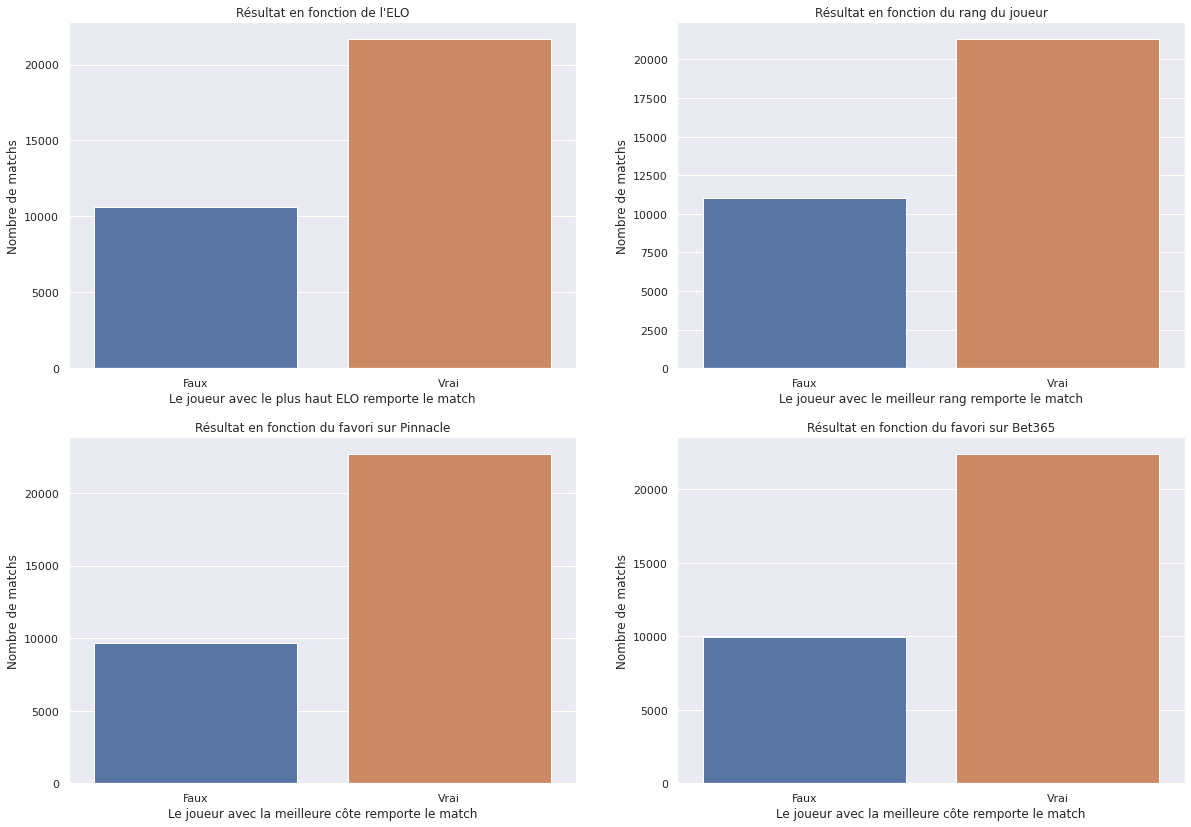

In [ ]:
# Construction d'un subplot de VBar permettant de visualiser les résultats des colonnes créées auparavant

plt.figure(figsize = (20,14))

plt.subplot(221)
sns.countplot(df['ELO_Predicable_Win']);
plt.xlabel('Le joueur avec le plus haut ELO remporte le match');
plt.xticks([0, 1], ['Faux', 'Vrai']);
plt.ylabel('Nombre de matchs');
plt.title("Résultat en fonction de l'ELO");

plt.subplot(222)
sns.countplot(df['Rank_Predicable_Win']);
plt.xlabel('Le joueur avec le meilleur rang remporte le match');
plt.xticks([0, 1], ['Faux', 'Vrai']);
plt.ylabel('Nombre de matchs');
plt.title("Résultat en fonction du rang du joueur");

plt.subplot(223)
sns.countplot(df['Pinnacle_Predicable_Win']);
plt.xlabel('Le joueur avec la meilleure côte remporte le match');
plt.xticks([0, 1], ['Faux', 'Vrai']);
plt.ylabel('Nombre de matchs');
plt.title("Résultat en fonction du favori sur Pinnacle");

plt.subplot(224)
sns.countplot(df['B365_Predicable_Win']);
plt.xlabel('Le joueur avec la meilleure côte remporte le match');
plt.xticks([0, 1], ['Faux', 'Vrai']);
plt.ylabel('Nombre de matchs');
plt.title("Résultat en fonction du favori sur Bet365");

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


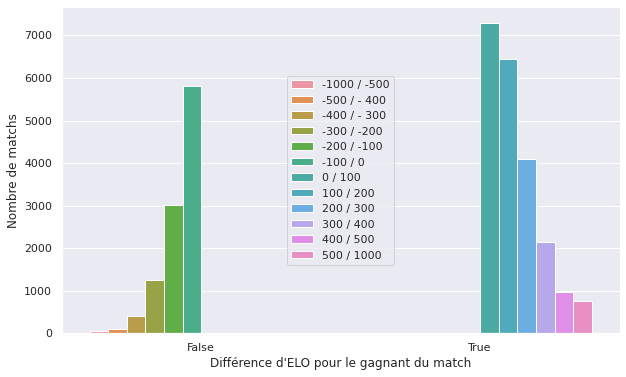

In [ ]:
### Répartition des victoires en fonction de la différence d'ELO
plt.figure(figsize = (10,6))

sns.countplot(df['ELO_Predicable_Win'], hue = df['ELO_Diff_Gagnant']);
plt.legend(loc = 'center');
plt.xlabel("Différence d'ELO pour le gagnant du match");
plt.ylabel("Nombre de matchs");

In [ ]:
### Vérification graphique de stratégie (Pari sur le mieux classé à l'ELO / Favori pour le bookmaker sur les deux bookmakers)

roi_favori_ps=100*(df.PSW[df['PSW']<df['PSL']].sum()-len(df))/len(df)
roi_meilleur_rang_ps=100*(df.PSW[df['elo_winner']>df['elo_loser']].sum()-len(df))/len(df)

roi_favori_365=100*(df.B365W[df['B365W']<df['B365L']].sum()-len(df))/len(df)
roi_meilleur_rang_365=100*(df.B365W[df['elo_winner']>df['elo_loser']].sum()-len(df))/len(df)

labels = ["Favori pour \n Pinnacle","Pari sur le mieux classé ELO \n Pinnacle", "Favori pour \n Bet365","Pari sur le mieux classé ELO \n Bet365 "]

p = figure(plot_height = 400, plot_width = 400, y_range = labels, x_range = (0,-10))

p.hbar(y = labels, 
       right = [roi_favori_ps, roi_meilleur_rang_ps, roi_favori_365, roi_meilleur_rang_365], 
       height = 0.9,
       color = ['orange', 'red', 'pink', 'purple',])

show(p)

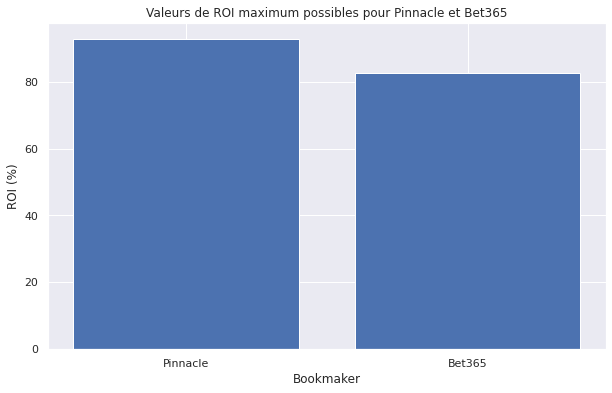

In [ ]:
# Calcul du ROI maximum possible
max_roi_ps = 100*(df.PSW.sum()-len(df))/len(df)
max_roi_365 = 100*(df.B365W.sum()-len(df))/len(df)

# Création du graphique
values = [max_roi_ps, max_roi_365]
labels = ["Pinnacle","Bet365"]
xaxis_label = "Bookmaker"
title = "Valeurs de ROI maximum possibles pour Pinnacle et Bet365"

plt.figure( figsize = (10,6))
plt.bar(labels, values)
plt.xlabel(xaxis_label)
plt.ylabel("ROI (%)")
plt.title(title)
plt.show()

In [ ]:
### Stockage dans une variable de la proba_elo, transformée en %

proba_elo_en_pct = df['proba_elo']*100

### Instanciation de la figure Bokeh

p = figure(plot_width = 600, plot_height = 400, y_range = (0,1000), x_range = (50,100), title = "Probabilité de victoire en fonction de l'écart d'ELO du favori")

### Tracé de la droite

p.scatter(proba_elo_en_pct,                    
          df['ELO_Diff'],                         
          line_alpha = 0.6,
          line_color = "red",
          fill_alpha = 0) 

### Modification des différentes données du graphique

p.title.align = 'center'
p.xaxis.ticker = [50, 60, 70, 80, 90, 100]
p.xaxis.major_label_overrides = {50: '50%', 60: '60%', 70: '70%', 80: '80%', 90: '90%', 100: '100%'}

show(p)

In [ ]:
### PRE-PROCESSING

In [ ]:
# On réattribue les colonnes Winner/Loser au profit d'un J1/J2 pour enlever le biais de connaitre le résultat à l'avance

df['Joueur_1'] = np.where(np.random.rand(len(df)) > 0.5, df['Winner'], df['Loser'])
df['Joueur_2'] = np.where(df['Joueur_1'] == df['Winner'], df['Loser'], df['Winner'])

In [ ]:
### ANONIMISATION DES DONNÉES

# Réaffectation de la côte à chaque joueur et non plus au couple Winner/Loser

df['PSJ1'] = np.where(df['Winner'] == df['Joueur_1'], df['PSW'], df['PSL'])
df['PSJ2'] = np.where(df['Winner'] == df['Joueur_1'], df['PSL'], df['PSW'])

# Réaffectation de l'ELO à chaque joueur et non plus au couple Winner/Loser

df['elo_J1'] = np.where(df['Winner'] == df['Joueur_1'], df['elo_winner'], df['elo_loser'])
df['elo_J2'] = np.where(df['Winner'] == df['Joueur_1'], df['elo_loser'], df['elo_winner'])

# Proba ELO pour chaque joueur

df['proba_elo_J1'] = np.where(df['Winner'] == df['Joueur_1'], df['proba_elo'], 1 - df['proba_elo'])
df['proba_elo_J2'] = np.where(df['Winner'] == df['Joueur_1'], 1 - df['proba_elo'], df['proba_elo'])

In [ ]:
### CREATION DE VARIABLES EXPLICATIVES

# Créer les colonnes qui calcule le pourcentage de victoires pour chaque joueur

win= df['Winner'].value_counts()
matchs_played = df[['Winner', 'Loser']].stack().value_counts()

winrate = (win / matchs_played).round(2)

df['winrate_J1'] = df['Joueur_1'].map(winrate)
df['winrate_J2'] = df['Joueur_2'].map(winrate)

# Créer les colonnes qui calcule le pic ELO pour chaque joueur

maxima_elo = df.groupby('Loser')['elo_loser'].max()

df['max_elo_J1'] = df['Joueur_1'].map(maxima_elo)
df['max_elo_J2'] = df['Joueur_2'].map(maxima_elo)

In [ ]:
df[['winrate_J1', 'winrate_J2']] = df[['winrate_J1', 'winrate_J2']].fillna(0) ### Suppression des valeurs nulles (ici par manque de données pour le calcul du winrate)
df[['max_elo_J1', 'max_elo_J2']] = df[['max_elo_J1', 'max_elo_J2']].fillna(1500)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32343 entries, 0 to 32342
Data columns (total 41 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   ATP                      32343 non-null  int64         
 1   Location                 32343 non-null  object        
 2   Tournament               32343 non-null  object        
 3   Date                     32343 non-null  datetime64[ns]
 4   Series                   32343 non-null  object        
 5   Court                    32343 non-null  object        
 6   Surface                  32343 non-null  object        
 7   Round                    32343 non-null  object        
 8   Best of                  32343 non-null  int64         
 9   Winner                   32343 non-null  object        
 10  Loser                    32343 non-null  object        
 11  WRank                    32343 non-null  int64         
 12  LRank                    32343 n

In [ ]:
### CREATION DE LA TARGET

df['Target'] = np.where(df['Joueur_1'] == df['Winner'], 0, 1)

In [ ]:
# On retire des colonnes pour alléger la base de données afin d'avoir un retour du modèle plus rapide

df = df.drop(['ATP', 'Comment', 'Location', 'Tournament', 'Series','Round', 'Best of', 'B365W', 'B365L', 'Wsets', 'Lsets', 'WRank', 
              'LRank', 'B365_Predicable_Win','Rank_Predicable_Win', 'ELO_Diff', 'ELO_Diff_Gagnant', 'ELO_Predicable_Win',
              'Pinnacle_Predicable_Win', 'Winner', 'Loser', 'Date', 'Court', 'PSW', 'PSL', 'elo_winner', 'elo_loser', 'proba_elo'],
               axis=1)

In [ ]:
df

,Surface,Joueur_1,Joueur_2,PSJ1,PSJ2,elo_J1,elo_J2,proba_elo_J1,proba_elo_J2,winrate_J1,winrate_J2,max_elo_J1,max_elo_J2,Target
0,Hard,Ulihrach B.,Kiefer N.,2.210,1.719,1486.195239,1618.182210,0.318694,0.681306,0.28,0.60,1514.436501,1854.805943,0
1,Hard,Youzhny M.,Schuettler R.,3.250,1.385,1615.057648,1820.759485,0.234313,0.765687,0.56,0.40,1890.232557,1820.759485,0
2,Hard,Sargsian S.,Carraz G.,1.746,2.180,1654.468551,1588.330984,0.594046,0.405954,0.35,0.33,1682.177005,1614.503613,0
3,Hard,Pless K.,Lisnard J.R.,2.580,1.562,1473.299803,1533.308961,0.414489,0.585511,0.26,0.28,1475.171930,1560.481064,1
4,Hard,Levy H.,Portas A.,1.641,2.360,1401.283125,1418.621881,0.475068,0.524932,0.21,0.29,1433.131397,1481.461834,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32338,Hard,Bautista Agut R.,Pouille L.,1.650,2.430,1835.901543,1842.459807,0.490563,0.509437,0.67,0.59,1868.938997,1842.459807,0
32339,Hard,Anderson K.,Donaldson J.,1.340,3.630,1843.576914,1647.967561,0.755103,0.244897,0.58,0.46,1900.163843,1706.319915,0
32340,Clay,Zeballos H.,Jarry N.,2.090,1.850,1619.758421,1588.293069,0.545159,0.454841,0.38,0.50,1679.086434,1605.738153,1
32341,Hard,Del Potro J.M.,Anderson K.,1.520,2.750,1966.532849,1851.413609,0.659862,0.340138,0.69,0.58,2116.521771,1900.163843,0


In [ ]:
# Séparation du jeu de données en deux DataFrame (dont un pour sortir la cible)

feats = df.drop(['Target', 'Joueur_1', 'Joueur_2'], axis = 1)

target = df['Target']


In [ ]:
# Séparation des dataframes afin d'avoir un jeu d'entrainement et un jeu de test

X_train, X_test, y_train, y_test = train_test_split(feats, target, test_size = 0.25, shuffle = False)

In [ ]:
X_test.head()

,Surface,PSJ1,PSJ2,elo_J1,elo_J2,proba_elo_J1,proba_elo_J2,winrate_J1,winrate_J2,max_elo_J1,max_elo_J2
24257,Hard,3.34,1.37,1466.460696,1653.731729,0.253881,0.746119,0.32,0.40,1548.553077,1692.032281
24258,Hard,1.58,2.55,1790.904581,1644.311236,0.699277,0.300723,0.62,0.57,1964.670084,1910.965921
24259,Hard,1.28,4.14,1858.280563,1683.700717,0.732033,0.267967,0.60,0.53,1986.995795,1894.553939
24260,Clay,2.30,1.69,1527.144083,1611.181063,0.381366,0.618634,0.49,0.45,1788.708722,1697.286582
24261,Clay,1.26,4.30,1596.892864,1491.234424,0.647534,0.352466,0.50,0.27,1791.549404,1504.249092


In [ ]:
# Standardisation des valeurs numériques

sc = StandardScaler()

col_num = ['PSJ1', 'PSJ2', 'elo_J1', 'elo_J2', 'proba_elo_J1', 'proba_elo_J2', 'winrate_J1', 'winrate_J2', 'max_elo_J1', 'max_elo_J2']

X_train[col_num] = sc.fit_transform(X_train[col_num])
X_test[col_num] = sc.transform(X_test[col_num])

In [ ]:
#Encoding sur les variables explicatives/catégorielles (ici textuelles) avec un .replace

X_train['Surface'].replace(['Hard', 'Clay', 'Grass', 'Carpet'], [0, 1, 2, 3], inplace=True)
X_test['Surface'].replace(['Hard', 'Clay', 'Grass', 'Carpet'], [0, 1, 2, 3], inplace=True)

In [ ]:
# Modèles à tester
lr = LogisticRegression()
knn = KNeighborsClassifier()
rf = RandomForestClassifier()
clftree = tree.DecisionTreeClassifier()

# Entraînement des modèles
lr.fit(X_train, y_train)
print("score du lr : {}".format(lr.score(X_test, y_test)))

knn.fit(X_train, y_train)
print("score du knn : {}".format(knn.score(X_test, y_test)))

rf.fit(X_train, y_train)
print("score du rf : {}".format(rf.score(X_test, y_test)))

clftree.fit(X_train, y_train)
print("score du clftree : {}".format(clftree.score(X_test, y_test)))

### Nous allons donc choisir la LogisticRegression qui obtient ici le meilleur score

score du lr : 0.7102399208508533
score du knn : 0.666584219638882
score du rf : 0.6921840217660153
score du clftree : 0.6192184021766015


In [ ]:
from sklearn.linear_model import LogisticRegression

reglog = LogisticRegression()
reglog.fit(X_train, y_train)

print('Score sur ensemble train', reglog.score(X_train, y_train))
print('Score sur ensemble test', reglog.score(X_test, y_test))

Score sur ensemble train 0.7091148946695799
Score sur ensemble test 0.7102399208508533


In [ ]:
from sklearn.metrics import classification_report

y_pred = reglog.predict(X_test)

display(pd.crosstab(y_test,y_pred, rownames=['Realité'], colnames=['Prédiction']))

print(classification_report(y_test, y_pred, ))

Prédiction,0,1
Realité,,
0,2887,1192
1,1151,2856


              precision    recall  f1-score   support

           0       0.71      0.71      0.71      4079
           1       0.71      0.71      0.71      4007

    accuracy                           0.71      8086
   macro avg       0.71      0.71      0.71      8086
weighted avg       0.71      0.71      0.71      8086



In [ ]:
# définir les hyperparamètres à tester
param_grid = {'penalty': ['l1', 'l2'], 'C': [0.1, 1, 10]}

# définir le modèle
model = LogisticRegression(solver='liblinear')

# définir la grille de recherche
grid_search = GridSearchCV(model, param_grid, cv=4, n_jobs=-1, error_score='raise')

# ajuster la grille de recherche aux données
try:
    grid_search.fit(X_train, y_train)
except Exception as e:
    print('Error: ', e)

# afficher les meilleurs paramètres et score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best parameters:  {'C': 1, 'penalty': 'l1'}
Best score:  0.7091977548632122


In [ ]:
y_test

24257    0
24258    0
24259    1
24260    1
24261    0
        ..
32338    0
32339    0
32340    1
32341    0
32342    0
Name: Target, Length: 8086, dtype: int64

In [ ]:
def allocation_paris(base_cagnotte=0, mise_min=10, mise_max=1000, sureté=0.99):

    y_pred_proba = grid_search.predict_proba(X_test) 

    cagnotte = base_cagnotte
    
    mise_totale = 0
    
    for i, probas in enumerate(y_pred_proba):
        
        cotes_J1 = df['PSJ1'].loc[i+24257]
        cotes_J2 = df['PSJ2'].loc[i+24257]
                
        if probas[0]>sureté:
            if y_test.loc[i+24257]==0:
                print('parier {}€ sur victoire Joueur 1 -'.format(round(mise_min+(mise_max-mise_min)*(probas[0]-sureté)/(1-sureté))) ,
                      'cote à {} -'.format(cotes_J1),
                      'GAGNÉ - cagnotte : {}€'.format(cagnotte + round((mise_min+(mise_max-mise_min)*(probas[0]-sureté)/(1-sureté))*(cotes_J1))))
                cagnotte += round((mise_min+(mise_max-mise_min)*(probas[0]-sureté)/(1-sureté))*(cotes_J1))
            else:
                print('parier {}€ sur victoire Joueur 1 -'.format(round(mise_min+(mise_max-mise_min)*(probas[0]-sureté)/(1-sureté))) ,
                      'cote à {} -'.format(cotes_J1),
                      'PERDU - cagnotte : {}€'.format(cagnotte - round(mise_min+(mise_max-mise_min)*(probas[0]-sureté)/(1-sureté))))
                cagnotte -= round(mise_min+(mise_max-mise_min)*(probas[0]-sureté)/(1-sureté))
            mise_totale += round(mise_min+(mise_max-mise_min)*(probas[0]-sureté)/(1-sureté))
                
        if probas[1]>sureté:
            if y_test.loc[i+24257]==1:
                print('parier {}€ sur victoire Joueur 2 -'.format(round(mise_min+(mise_max-mise_min)*(probas[1]-sureté)/(1-sureté))) ,
                      'cote à {} -'.format(cotes_J2),
                      'GAGNÉ - cagnotte : {}€'.format(cagnotte + round((mise_min+(mise_max-mise_min)*(probas[1]-sureté)/(1-sureté))*(cotes_J2))))
                cagnotte += round((mise_min+(mise_max-mise_min)*(probas[1]-sureté)/(1-sureté))*(cotes_J2))
            else:
                print('parier {}€ sur victoire Joueur 2 -'.format(round(mise_min+(mise_max-mise_min)*(probas[1]-sureté)/(1-sureté))) ,
                      'cote à {} -'.format(cotes_J2),
                      'PERDU - cagnotte : {}€'.format(cagnotte - round(mise_min+(mise_max-mise_min)*(probas[1]-sureté)/(1-sureté))))
                cagnotte -= round(mise_min+(mise_max-mise_min)*(probas[1]-sureté)/(1-sureté))
            mise_totale += round(mise_min+(mise_max-mise_min)*(probas[1]-sureté)/(1-sureté))
                            
    print("La mise totale a été de ", mise_totale, '€')

allocation_paris()

parier 588€ sur victoire Joueur 2 - cote à 1.04 - GAGNÉ - cagnotte : 612€
parier 614€ sur victoire Joueur 2 - cote à 1.02 - GAGNÉ - cagnotte : 1238€
parier 59€ sur victoire Joueur 2 - cote à 1.03 - GAGNÉ - cagnotte : 1298€
parier 993€ sur victoire Joueur 1 - cote à 1.01 - GAGNÉ - cagnotte : 2301€
parier 689€ sur victoire Joueur 1 - cote à 1.02 - GAGNÉ - cagnotte : 3003€
parier 731€ sur victoire Joueur 1 - cote à 1.02 - GAGNÉ - cagnotte : 3748€
parier 777€ sur victoire Joueur 2 - cote à 1.02 - GAGNÉ - cagnotte : 4541€
parier 870€ sur victoire Joueur 1 - cote à 1.02 - GAGNÉ - cagnotte : 5428€
parier 958€ sur victoire Joueur 2 - cote à 1.01 - GAGNÉ - cagnotte : 6395€
parier 577€ sur victoire Joueur 1 - cote à 1.03 - GAGNÉ - cagnotte : 6989€
parier 497€ sur victoire Joueur 1 - cote à 1.03 - GAGNÉ - cagnotte : 7501€
parier 713€ sur victoire Joueur 2 - cote à 1.04 - GAGNÉ - cagnotte : 8242€
parier 898€ sur victoire Joueur 1 - cote à 1.01 - GAGNÉ - cagnotte : 9149€
parier 855€ sur victoire Jo

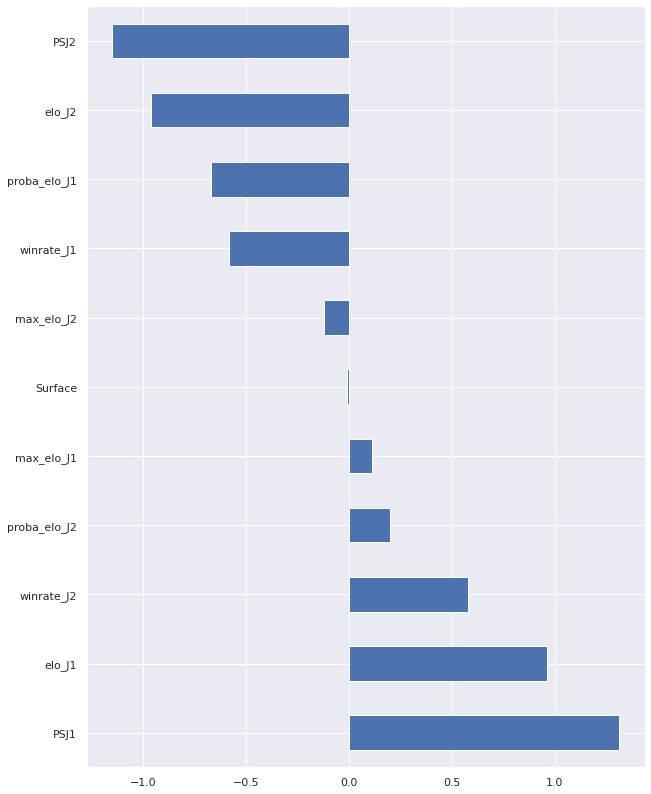

In [ ]:
plt.figure(figsize = (10,14))
pd.Series(grid_search.best_estimator_.coef_[0], X_test.columns).sort_values(ascending=False).plot(kind='barh');